In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


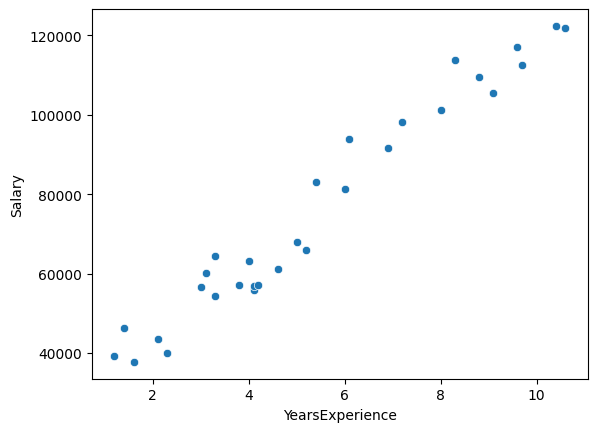

In [27]:
sns.scatterplot(data=df, x="YearsExperience", y="Salary")
plt.show()

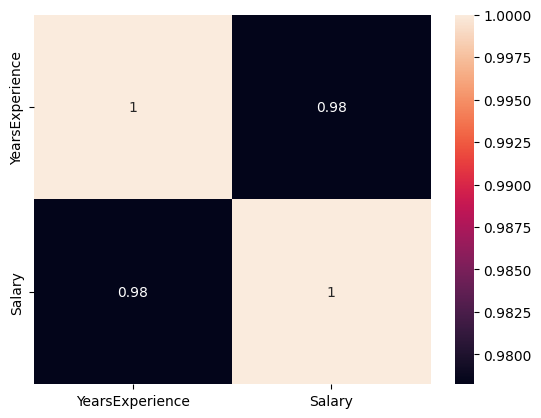

In [13]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [31]:
def squaredError(df, m, b):
    error = 0
    n = len(df)
    
    for row in range(n):
        y_true = df.iloc[row].Salary
        y_pred = m * df.iloc[row].YearsExperience + b
        error += (y_true - y_pred) ** 2
        
    return error / n

In [62]:
def gradient(dt, m_now, b_now, L):
    m_grad = 0
    b_grad = 0
    n = len(dt)

    for row in range(n):
        x = dt.iloc[row].YearsExperience
        y = dt.iloc[row].Salary
        m_grad += x * (y - (m_now * x + b_now))
        b_grad += y - (m_now * x + b_now)

    m_grad /= -(2/n)
    b_grad /= -(2/n)
    
    m = m_now - L * m_grad
    b = b_now - L * b_grad

    return m, b

In [63]:
m = 0
b = 0
l = 0.0001
epochs = 1000
for times in range(epochs):
    m, b = gradient(df, m, b, l)
    if times % 100 == 0:
        print(m, b)

21825.1986 3420.1800000000003
10768.84400435347 15861.982684790579
9970.82359531358 21299.307409182595
9655.66422036181 23446.650813107448
9531.199444154527 24294.69354149079
9482.045010723192 24629.608053929445
9462.63262434705 24761.874656646327
9454.966159320187 24814.110237800698
9451.938469428318 24834.739450939072
9450.742754578096 24842.88647305128


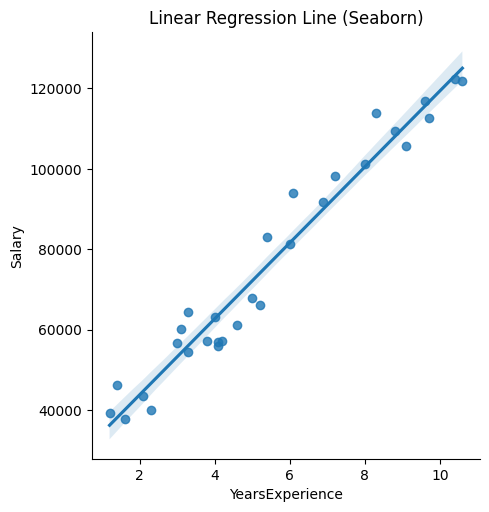

In [68]:
sns.lmplot(x="YearsExperience", y="Salary", data=df)
plt.title("Linear Regression Line (Seaborn)")
plt.show()

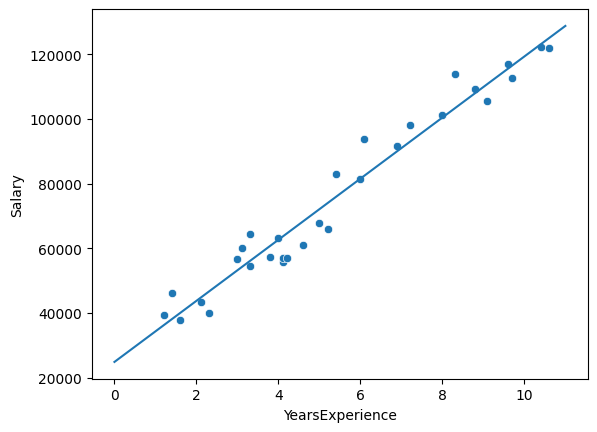

In [71]:
sns.scatterplot(data=df, x="YearsExperience", y="Salary")
plt.plot(list(range(0,12)), [m * x + b for x in range(0, 12)])
plt.show()

In [74]:
print(m * 8 + b)

100448.27164211601
